## Assignment - 2 Artificial Intelligence – A Canadian Perspective
### INSTRUCTOR: Mohammed Saiful Islam
### Submitted by Group : Python Panthers
###                                           Akshay Vijaykumar (C0788183)
###                                           Dhaval Barot (C0778787)
###                                           Jibin John (C0796674)
###                                           Sweety Patel (C0789805)
                    

**The code we have written is for predicting whether a person is diabetic or not using the diabetes dataset. We have used keras (ANN) technique and also implemented a simple naive bayes model to predict the results.**

In [40]:
#importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [41]:
#defining the function to calculate the Accuracy, Precision, Recall and Harmonic Mean
def classification_function(y_test,y_pred):
   # y_test.to_numpy(dtype ='int64')
    #y_pred.tolist()
    TP = FP = TN = FN = 0
    for i in range(len(y_pred)):
        if y_test[i]== 0 and y_pred[i]==0:
            TP +=1
        if y_test[i]==1 and y_pred[i]==1:
            TN +=1
        if y_test[i]== 0 and y_pred[i]==1:
            FP +=1
        if y_test[i]== 1 and y_pred[i]==0:
            FN +=1
    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    Precision = TP / (TP+FP)
    Recall = TP / (TP+TN)
    F1_score = 2 * (Precision * Recall)/(Precision + Recall)
    
    return TP,FP,TN,FN,Accuracy, Precision, Recall, F1_score

<b> Load the data </b>

In [42]:
#Below is the url of diabetes dataset in UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'
original_data=pd.read_csv(url)
original_data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Attribute Information:**

Age :20-65
Sex : Male,Female
Polyuria 1.Yes, 2.No
Polydipsia 1.Yes, 2.No.
sudden weight loss 1.Yes, 2.No.
weakness 1.Yes, 2.No.
Polyphagia 1.Yes, 2.No.
Genital thrush 1.Yes, 2.No.
visual blurring 1.Yes, 2.No.
Itching 1.Yes, 2.No.
Irritability 1.Yes, 2.No.
delayed healing 1.Yes, 2.No.
partial paresis 1.Yes, 2.No.
muscle stiffness 1.Yes, 2.No.
Alopecia 1.Yes, 2.No.
Obesity 1.Yes, 2.No.
Class 1.Positive, 2.Negative


In [43]:
#Checking the datatype of each attribute
original_data.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [44]:
# Checking the shape: no of records and no of columns
original_data.shape

(520, 17)

In [45]:
#Summing up null values if any
original_data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [46]:
#To check the missing values and ? represents the missing values
if '?' in original_data.values : 
    print("\nThis value exists in Dataframe")
else:
    print("Ther are no missing values")

Ther are no missing values


<b>
Many of the columns are yes, no etc. Let's print unique values in object columns to see data values</b>

In [47]:
#Defining a function to check unique value in every column
def print_unique_col_values(original_data):
       for column in original_data:
            if original_data[column].dtypes=='object':
                print(f'{column}: {original_data[column].unique()}')

In [48]:
print_unique_col_values(original_data)

Gender: ['Male' 'Female']
Polyuria: ['No' 'Yes']
Polydipsia: ['Yes' 'No']
sudden weight loss: ['No' 'Yes']
weakness: ['Yes' 'No']
Polyphagia: ['No' 'Yes']
Genital thrush: ['No' 'Yes']
visual blurring: ['No' 'Yes']
Itching: ['Yes' 'No']
Irritability: ['No' 'Yes']
delayed healing: ['Yes' 'No']
partial paresis: ['No' 'Yes']
muscle stiffness: ['Yes' 'No']
Alopecia: ['Yes' 'No']
Obesity: ['Yes' 'No']
class: ['Positive' 'Negative']


In [49]:
data=original_data

In [50]:
#Replacing the values  of 'Yes' and 'No' to numerical
data=original_data.replace(to_replace=['No', 'Yes'], value=[0, 1])
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [51]:
#Replacing the values of 'Positive' and 'Negative' to numerical
data=data.replace(to_replace=['Positive','Negative'], value=[1, 0])
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [52]:
#Replacing the Gender value to Numerical
data=data.replace(to_replace=['Male','Female'], value=[1, 0])
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [53]:
#Checking the every attribute again to see any unwanted/missing/Nan values exists in any column
data.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

**Checking for Outliers**

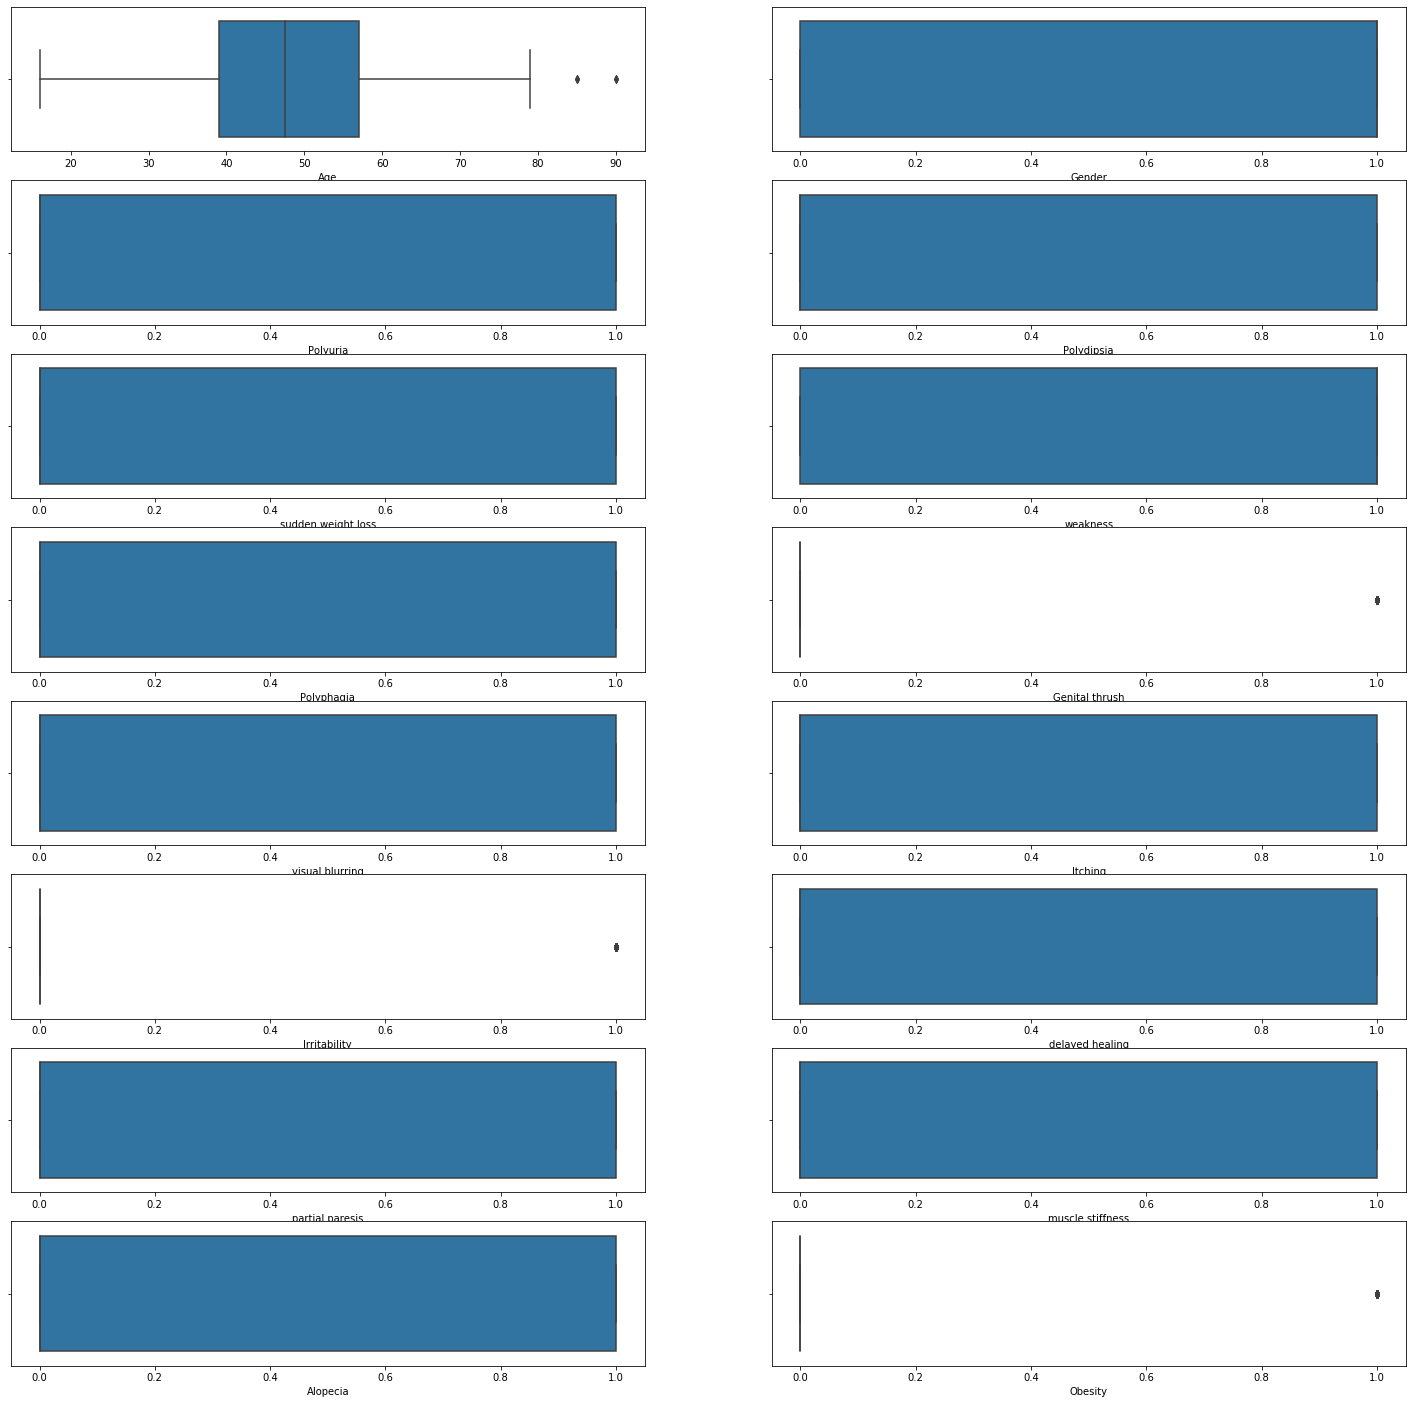

In [54]:
#Plotting each column for outlier check
plt.figure(figsize = (25,25))
features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush'
            , 'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia'
            ,'Obesity']
for i in enumerate(features):
    plt.subplot(8,2,i[0]+1)
    sns.boxplot(data[i[1]])

**Using MinMax Scaler function to scale the Age attribute in the dataset**

In [55]:
cols_to_scale = ['Age']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0.432432,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.567568,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0.216216,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [56]:
#Dividing the dataset into features (X) and Label (y)

X = data.drop('class',axis='columns') # dropping the label 'class' 
y = data['class'] #saving 'class' only attribute

#Splitting the dataset into training and testing sets, the train to test ratio is 80:20
#Random state kept as 5 to get constant results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [57]:
X_train.shape

(416, 16)

## Modelling

**ANN model using Keras**

In [58]:
import tensorflow as tf
from tensorflow import keras

#Calling the Sequential model and defining each layer
## Note: Each layer except input layer is set after multiple testing and activation function is choosen
## to give the best accuracy score
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(16,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

#opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.6947
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.7452
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5277 - accuracy: 0.7067
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7115
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.8029
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8558
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy: 0.8678
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.8774
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3739 - accuracy: 0.8966
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8942
Epoch 11/

In [61]:
# Evaluating the model with test data and noting the accuracy
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1618 - accuracy: 0.9423


[0.16177470982074738, 0.942307710647583]

In [62]:
#Predicting the values for test data and storing in y
y= model.predict(X_test)
y[:5]

array([[0.00734657],
       [0.03423932],
       [0.8115257 ],
       [0.9995093 ],
       [0.00552619]], dtype=float32)

In [63]:
#Converting predicted values for calculating scores
y_pred = []
for element in y:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

**Simple Naive Bayes Model to test the same dataset**

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
pred1 =gnb.predict(X_test)
A2 = round(accuracy_score(y_test, pred1, normalize = True)*100,2)
print("Naive-Bayes accuracy is",A2)

Naive-Bayes accuracy is 93.27


In [65]:
#Creating confusion matrix to cross check results
cm_ann = confusion_matrix(y_test,y_pred)  #confusion matrix of ANN model
cm_naive = confusion_matrix(y_test,pred1) # confusion matrix of Naive Bayes

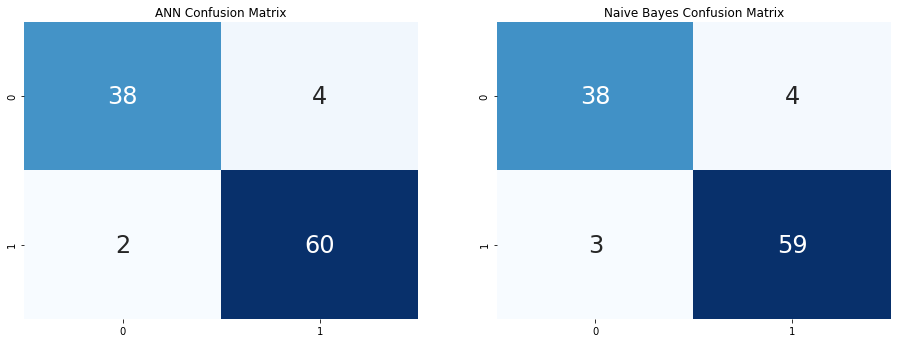

In [66]:
#Plotting the confusion matrix
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("ANN Confusion Matrix")
sns.heatmap(cm_ann,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,2)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_naive,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [67]:
#Converting the pandas series to list array for our function to derive results
y_test = y_test.tolist()

In [69]:
#ANN results
TP_ann,FP_ann,TN_ann,FN_ann,Accuracy_ann, Precision_ann, Recall_ann, F1_score_ann = classification_function(y_test,y_pred)
print("Accuracy of ANN is",Accuracy_ann)
print("Precision of ANN is",Precision_ann)
print("Recall of ANN is",Recall_ann)
print("F1 score of ANN is",F1_score_ann)

Accuracy of ANN is 0.9423076923076923
Precision of ANN is 0.9047619047619048
Recall of ANN is 0.3877551020408163
F1 score of ANN is 0.5428571428571428


In [32]:
#Naive Bayes Results
TP,FP,TN,FN,Accuracy, Precision, Recall, F1_score = classification_function(y_test,pred1)
print("Accuracy of NB is",Accuracy)
print("Precision of NB is",Precision)
print("Recall of NB is",Recall)
print("F1 score of NB is",F1_score)

Accuracy of NB is 0.9326923076923077
Precision of NB is 0.9047619047619048
Recall of NB is 0.3917525773195876
F1 score of NB is 0.5467625899280576


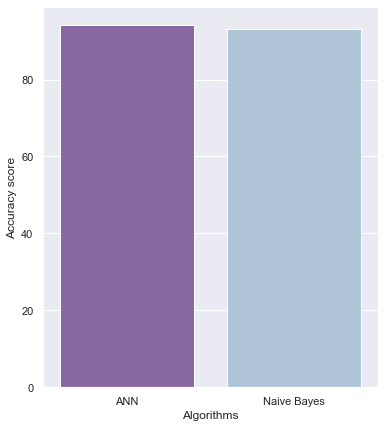

In [241]:
# Cross comparing the accuracy scores of each model
ANN = (round(Accuracy_ann*100,2))
Naive = (round(Accuracy*100,2))
algorithms=["ANN","Naive Bayes"]
scores=[ANN, Naive]
sns.set(rc={'figure.figsize':(6,7)})
plt.xlabel("Algorithms")
plt.ylabel('Accuracy score')
sns.barplot(algorithms,scores, palette = 'BuPu_r')

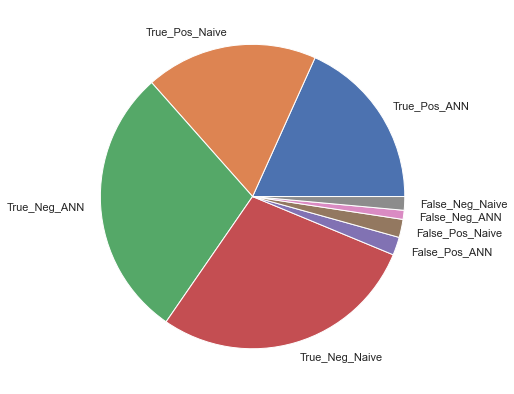

In [221]:
#Pie chart for true and false values
w = np.array([TP_ann,TP,TN_ann,TN,FP_ann,FP,FN_ann,FN])
Label = ['True_Pos_ANN','True_Pos_Naive','True_Neg_ANN','True_Neg_Naive',
        'False_Pos_ANN','False_Pos_Naive','False_Neg_ANN','False_Neg_Naive']
plt.pie(w, labels = Label)
plt.show() 

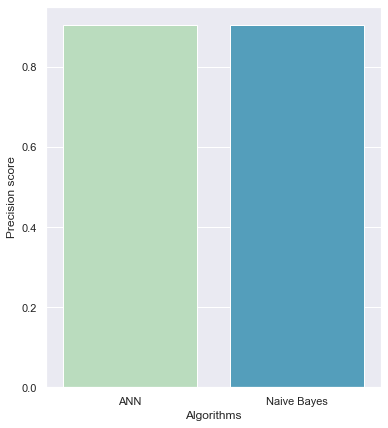

In [242]:
# Cross comparing the Precision of each model

scores=[Precision_ann, Precision]
sns.set(rc={'figure.figsize':(6,7)})
plt.xlabel("Algorithms")
plt.ylabel('Precision score')
sns.barplot(algorithms,scores, palette = 'GnBu')

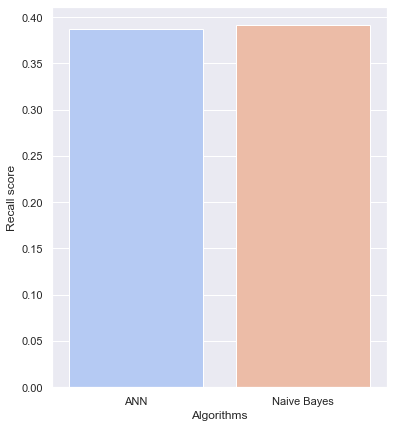

In [244]:
# Cross comparing the Recall of each model
scores=[Recall_ann, Recall]
sns.set(rc={'figure.figsize':(6,7)})
plt.xlabel("Algorithms")
plt.ylabel('Recall score')
sns.barplot(algorithms,scores, palette = 'coolwarm')